In [26]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
#spx = yf.Ticker("^GSPC")
spx = yf.Ticker("SPY")
spx_data = spx.history(period="730d", interval="1h")  # Fetch hourly data for the last 730 days

In [4]:
# Convert to pandas DataFrame and set Datetime as index
spx_df = pd.DataFrame(spx_data)
spx_df.index = pd.to_datetime(spx_df.index)
spx_df.reset_index(inplace=True)
spx_df.set_index('Datetime', inplace=True)

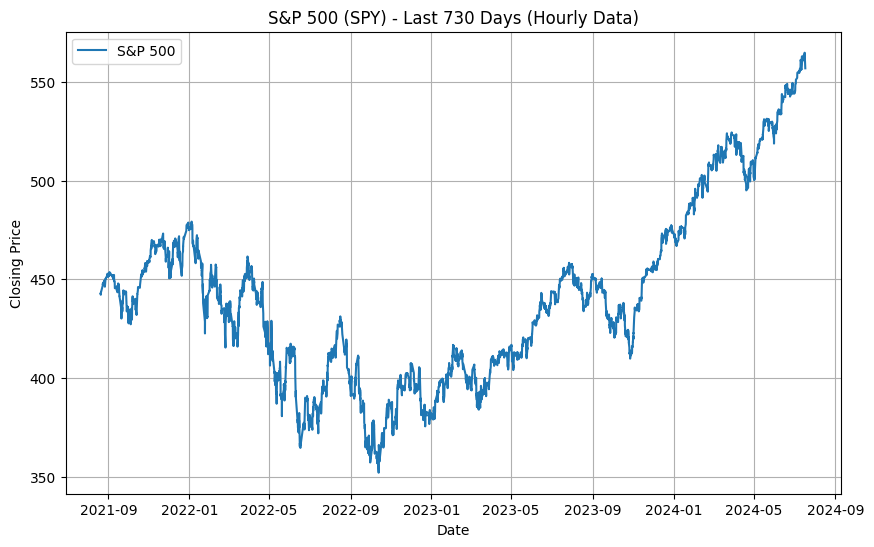

In [39]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(spx_df.index, spx_df['Close'], label='S&P 500')
plt.title('S&P 500 (SPY) - Last 730 Days (Hourly Data)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
spx_df = pd.DataFrame(spx_data)
spx_df.head(20)

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2021-08-20 09:30:00-04:00,439.750000,442.950012,439.739990,442.559998,16422943,0.0,0.0,0.0
1,2021-08-20 10:30:00-04:00,442.549988,443.010010,442.010010,442.190002,13278367,0.0,0.0,0.0
2,2021-08-20 11:30:00-04:00,442.179993,443.260010,441.960999,443.239990,7546590,0.0,0.0,0.0
3,2021-08-20 12:30:00-04:00,443.230011,443.549988,443.170013,443.214996,3981033,0.0,0.0,0.0
4,2021-08-20 13:30:00-04:00,443.220001,443.329987,442.519989,442.649994,5800248,0.0,0.0,0.0
5,2021-08-20 14:30:00-04:00,442.660004,443.390015,442.459991,443.364990,5698575,0.0,0.0,0.0
6,2021-08-20 15:30:00-04:00,443.364990,443.709991,443.190002,443.339996,12228072,0.0,0.0,0.0
7,2021-08-23 09:30:00-04:00,445.160004,447.200012,445.140015,446.869995,12617344,0.0,0.0,0.0
8,2021-08-23 10:30:00-04:00,446.869995,447.739990,446.709991,447.480011,7666372,0.0,0.0,0.0
9,2021-08-23 11:30:00-04:00,447.484985,447.940002,447.484985,447.839996,5672760,0.0,0.0,0.0


In [7]:
spx_df.dtypes


Datetime         datetime64[ns, America/New_York]
Open                                      float64
High                                      float64
Low                                       float64
Close                                     float64
Volume                                      int64
Dividends                                 float64
Stock Splits                              float64
Capital Gains                             float64
dtype: object

In [8]:
spx_df['Datetime'] = pd.to_datetime(spx_df['Datetime'])
spx_df.set_index('Datetime', inplace=True)

# Extract the Open price at 09:30
df_open_0930 = spx_df[spx_df.index.strftime('%H:%M') == '09:30'][['Open']]
df_open_0930 = df_open_0930.rename(columns={'Open': 'Open_0930'})

# Shift the Close column to get the previous day's close
spx_df['Close_prev_day'] = spx_df['Close'].shift(1)

# Merge the Open price at 09:30 with the previous day's close
merged_df = df_open_0930.merge(spx_df[['Close_prev_day']], left_index=True, right_index=True)


In [9]:
merged_df['Gap'] = merged_df['Open_0930'] - merged_df['Close_prev_day']
merged_df['Gap_abs'] = merged_df['Gap'].abs()
merged_df['Gap_abs'] =round(merged_df['Gap_abs'],2)
# Calculate the gap as a percentage of the previous day's close
merged_df['Gap_pct'] = (merged_df['Gap'] / merged_df['Close_prev_day']) * 100
merged_df['Gap_pct'] = round(merged_df['Gap_pct'], 2)
merged_df.head(30)

,Open_0930,Close_prev_day,Gap,Gap_abs,Gap_pct
Datetime,,,,,
2021-08-20 09:30:00-04:00,439.750000,NaN,NaN,NaN,NaN
2021-08-23 09:30:00-04:00,445.160004,443.339996,1.820007,1.82,0.41
2021-08-24 09:30:00-04:00,447.859985,447.239990,0.619995,0.62,0.14
2021-08-25 09:30:00-04:00,448.170013,447.950012,0.220001,0.22,0.05
2021-08-26 09:30:00-04:00,448.609985,448.880005,-0.270020,0.27,-0.06
2021-08-27 09:30:00-04:00,447.119995,446.269989,0.850006,0.85,0.19
2021-08-30 09:30:00-04:00,450.970001,450.190002,0.779999,0.78,0.17
2021-08-31 09:30:00-04:00,452.130005,452.220001,-0.089996,0.09,-0.02
2021-09-01 09:30:00-04:00,452.290009,451.609985,0.680023,0.68,0.15


In [10]:
# Calculate and print max, min, and average of Gap
Gap_max = round(merged_df['Gap_abs'].max(),2)
Gap_min = round(merged_df['Gap_abs'].min(),2)
avg_gap = round(merged_df['Gap_abs'].mean(),2)

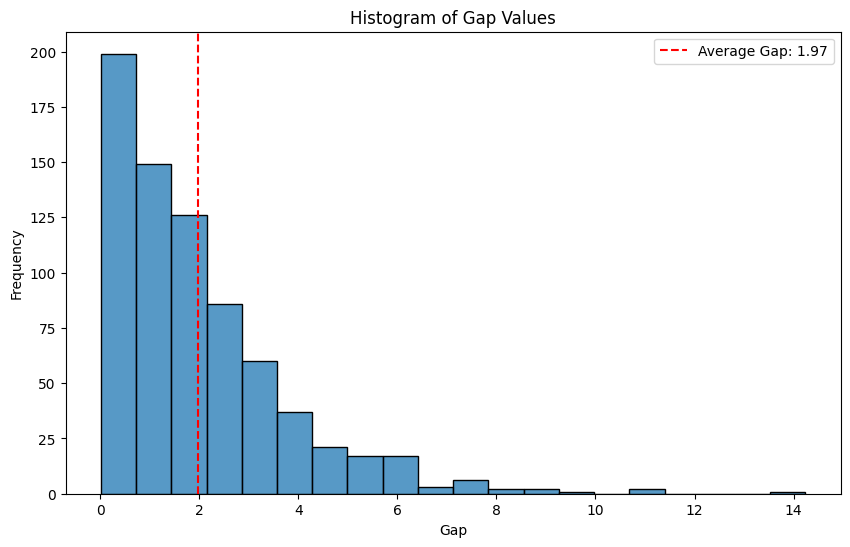

In [11]:
import seaborn as sns
# Plot histogram of the gap values
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Gap_abs'], bins=20, kde=False)
plt.title('Histogram of Gap Values')
plt.xlabel('Gap')
plt.ylabel('Frequency')
plt.axvline(avg_gap, color='r', linestyle='--', label=f'Average Gap: {avg_gap:.2f}')
plt.legend()
plt.show()

In [13]:
avg_gap_abs = merged_df['Gap_abs'].mean()
merged_df['above'] = merged_df['Gap_abs'] >= avg_gap_abs
# Print the count of Gap_abs values greater than or equal to the average gap
count_above_avg = merged_df['above'].sum()

In [36]:
#estimación beneficio suponiendo que un Gap de 6  puntos nos da un beneficio neto de 1 euro
df_gap = merged_df[merged_df['above']]
df_gap['profit'] = df_gap['Gap_abs']*100/6
df_gap['profit'] = round(df_gap['profit'],0)
neto = df_gap['profit'].sum()
neto = f"{neto:,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")

#estimación coste
coste = len(merged_df) * 20
df_gap

,Open_0930,Close_prev_day,Gap,Gap_abs,Gap_pct,above,profit
Datetime,,,,,,,
2021-09-10 09:30:00-04:00,451.299988,448.950012,2.349976,2.35,0.52,True,39.0
2021-09-13 09:30:00-04:00,448.790009,445.510010,3.279999,3.28,0.74,True,55.0
2021-09-17 09:30:00-04:00,444.929993,447.149994,-2.220001,2.22,-0.50,True,37.0
2021-09-20 09:30:00-04:00,433.929993,441.420013,-7.490021,7.49,-1.70,True,125.0
2021-09-21 09:30:00-04:00,436.529999,434.070007,2.459991,2.46,0.57,True,41.0
...,...,...,...,...,...,...,...
2024-06-05 09:30:00-04:00,530.770020,528.349976,2.420044,2.42,0.46,True,40.0
2024-06-12 09:30:00-04:00,541.359985,536.909973,4.450012,4.45,0.83,True,74.0
2024-06-21 09:30:00-04:00,544.400024,546.950012,-2.549988,2.55,-0.47,True,42.0


In [40]:
print(f"Total días estudiados: {len(merged_df)}")
print(f"Días con Gaps por encima de la media: {count_above_avg}")
print(f"Max Gap: {Gap_max}")
print(f"Average Gap: {avg_gap}")
print(f"Min Gap: {Gap_min}")
print(f"El coste anual de comprar un Straddle cada día al cierres es: {coste}€")
print(f"El resultado neto es de: {neto}€ (descontado ya el coste)")

Total días estudiados: 730
Días con Gaps por encima de la media: 274
Max Gap: 14.24
Average Gap: 1.97
Min Gap: 0.01
El coste anual de comprar un Straddle cada día al cierres es: 14600€
El resultado neto es de: 16.992€ (descontado ya el coste)


In [41]:
# Save the filtered DataFrame to a CSV file
df_gap.to_csv('gap_analysis_above_avg.csv', index=True)